In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.style.use('fivethirtyeight')
sns.set_context("notebook")

In [3]:
import requests
from pathlib import Path

namesbystate_path = Path('namesbystate.zip')
data_url = 'https://www.ssa.gov/oact/babynames/state/namesbystate.zip'

if not namesbystate_path.exists():
    print ('Downloading...', end=' ')
    resp = requests.get(data_url)
    with namesbystate_path.open('wb') as f:
        f.wirte(resp.content)
    print ('Done!')

In [4]:
import zipfile
zf = zipfile.ZipFile(namesbystate_path, 'r')
print ([f.filename for f in zf.filelist])

['DC.TXT', 'DE.TXT', 'FL.TXT', 'GA.TXT', 'HI.TXT', 'IA.TXT', 'ID.TXT', 'IL.TXT', 'IN.TXT', 'KS.TXT', 'KY.TXT', 'LA.TXT', 'MA.TXT', 'MD.TXT', 'ME.TXT', 'MI.TXT', 'MN.TXT', 'MO.TXT', 'MS.TXT', 'MT.TXT', 'NC.TXT', 'ND.TXT', 'NE.TXT', 'NH.TXT', 'NJ.TXT', 'NM.TXT', 'NV.TXT', 'NY.TXT', 'OH.TXT', 'OK.TXT', 'OR.TXT', 'PA.TXT', 'RI.TXT', 'SC.TXT', 'SD.TXT', 'TN.TXT', 'TX.TXT', 'UT.TXT', 'VA.TXT', 'VT.TXT', 'WA.TXT', 'WI.TXT', 'WV.TXT', 'WY.TXT', 'AK.TXT', 'AL.TXT', 'AR.TXT', 'AZ.TXT', 'CA.TXT', 'CO.TXT', 'CT.TXT', 'StateReadMe.pdf']


In [5]:
zf.extract('StateReadMe.pdf')

'/home/kaiser/coueses/DS100Spring18/notes/StateReadMe.pdf'

In [6]:
ca_name = 'CA.TXT'
with zf.open(ca_name) as f:
    for i in range(10):
        print (f.readline().rstrip().decode())

CA,F,1910,Mary,295
CA,F,1910,Helen,239
CA,F,1910,Dorothy,220
CA,F,1910,Margaret,163
CA,F,1910,Frances,134
CA,F,1910,Ruth,128
CA,F,1910,Evelyn,126
CA,F,1910,Alice,118
CA,F,1910,Virginia,101
CA,F,1910,Elizabeth,93


In [7]:
zf.extract(ca_name)
!head {ca_name}

In [8]:
!echo {ca_name}

CA.TXT


In [9]:
import os; os.unlink(ca_name)

In [10]:
import pandas as pd
field_names = ['State', 'Sex', 'Year', 'Name', 'Count']
with zf.open(ca_name) as fh:
    ca = pd.read_csv(fh, header=None, names=field_names)
ca.head()

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
2,CA,F,1910,Dorothy,220
3,CA,F,1910,Margaret,163
4,CA,F,1910,Frances,134


In [11]:
ca['Count'].head()

0    295
1    239
2    220
3    163
4    134
Name: Count, dtype: int64

In [12]:
ca[0:3]

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
2,CA,F,1910,Dorothy,220


In [13]:
ca.iloc[:3, -2:]

,Name,Count
0,Mary,295
1,Helen,239
2,Dorothy,220


In [14]:
ca.loc[0:3, 'State']

0    CA
1    CA
2    CA
3    CA
Name: State, dtype: object

In [15]:
ca['Name'].head()

0        Mary
1       Helen
2     Dorothy
3    Margaret
4     Frances
Name: Name, dtype: object

In [16]:
ca[['Name']].head()

,Name
0,Mary
1,Helen
2,Dorothy
3,Margaret
4,Frances


In [17]:
emails = ca.head()
emails.index = ['a@gmail.com', 'b@gmail.com', 'c@gamail.com', 'd@gmail.com', 'e@gmail.com']
emails

,State,Sex,Year,Name,Count
a@gmail.com,CA,F,1910,Mary,295
b@gmail.com,CA,F,1910,Helen,239
c@gamail.com,CA,F,1910,Dorothy,220
d@gmail.com,CA,F,1910,Margaret,163
e@gmail.com,CA,F,1910,Frances,134


In [18]:
emails.loc['b@gmail.com':'d@gmail.com', 'Year':'Name']

,Year,Name
b@gmail.com,1910,Helen
c@gamail.com,1910,Dorothy
d@gmail.com,1910,Margaret


In [19]:
emails.iloc[0:3]

,State,Sex,Year,Name,Count
a@gmail.com,CA,F,1910,Mary,295
b@gmail.com,CA,F,1910,Helen,239
c@gamail.com,CA,F,1910,Dorothy,220


In [20]:
ca.head()

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
2,CA,F,1910,Dorothy,220
3,CA,F,1910,Margaret,163
4,CA,F,1910,Frances,134


In [21]:
(ca['Year'] == 2016).head()

0    False
1    False
2    False
3    False
4    False
Name: Year, dtype: bool

In [22]:
ca[ca['Year'] == 2016].tail()

,State,Sex,Year,Name,Count
367926,CA,M,2016,Zekiel,5
367927,CA,M,2016,Ziyad,5
367928,CA,M,2016,Zorawar,5
367929,CA,M,2016,Zyan,5
367930,CA,M,2016,Zyir,5


In [23]:
ca_sorted = ca[ca['Year'] == 2016]
ca_sorted.sort_values('Count', ascending=False).tail(10)

,State,Sex,Year,Name,Count
217131,CA,F,2016,Maleena,5
217132,CA,F,2016,Maleny,5
217133,CA,F,2016,Maleya,5
217134,CA,F,2016,Mali,5
217135,CA,F,2016,Malika,5
217136,CA,F,2016,Manreet,5
217137,CA,F,2016,Manuela,5
217138,CA,F,2016,Marilee,5
217139,CA,F,2016,Marya,5
367930,CA,M,2016,Zyir,5


In [24]:
ca.head()

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
2,CA,F,1910,Dorothy,220
3,CA,F,1910,Margaret,163
4,CA,F,1910,Frances,134


In [25]:
ca.shape

(367931, 5)

In [26]:
ca.size

1839655

In [27]:
ca.describe()

,Year,Count
count,367931.000000,367931.000000
mean,1982.117169,81.850034
std,25.928678,303.826855
min,1910.000000,5.000000
25%,1966.000000,7.000000
50%,1988.000000,13.000000
75%,2003.000000,39.000000
max,2016.000000,8263.000000


In [28]:
ca.index

RangeIndex(start=0, stop=367931, step=1)

In [29]:
emails

,State,Sex,Year,Name,Count
a@gmail.com,CA,F,1910,Mary,295
b@gmail.com,CA,F,1910,Helen,239
c@gamail.com,CA,F,1910,Dorothy,220
d@gmail.com,CA,F,1910,Margaret,163
e@gmail.com,CA,F,1910,Frances,134


In [30]:
emails.index

Index(['a@gmail.com', 'b@gmail.com', 'c@gamail.com', 'd@gmail.com',
       'e@gmail.com'],
      dtype='object')

In [31]:
emails.index.name = 'Email'
emails

,State,Sex,Year,Name,Count
Email,,,,,
a@gmail.com,CA,F,1910,Mary,295
b@gmail.com,CA,F,1910,Helen,239
c@gamail.com,CA,F,1910,Dorothy,220
d@gmail.com,CA,F,1910,Margaret,163
e@gmail.com,CA,F,1910,Frances,134


In [32]:
emails.columns

Index(['State', 'Sex', 'Year', 'Name', 'Count'], dtype='object')

In [33]:
emails.columns.name = 'Fields'
emails

Fields,State,Sex,Year,Name,Count
Email,,,,,
a@gmail.com,CA,F,1910,Mary,295
b@gmail.com,CA,F,1910,Helen,239
c@gamail.com,CA,F,1910,Dorothy,220
d@gmail.com,CA,F,1910,Margaret,163
e@gmail.com,CA,F,1910,Frances,134


In [34]:
numbers = emails.copy()
numbers.index = [5,4,3,2,1]
numbers.index.name = 'order'
numbers.columns.name = None
numbers

,State,Sex,Year,Name,Count
order,,,,,
5,CA,F,1910,Mary,295
4,CA,F,1910,Helen,239
3,CA,F,1910,Dorothy,220
2,CA,F,1910,Margaret,163
1,CA,F,1910,Frances,134


In [35]:
numbers.iloc[1]

State       CA
Sex          F
Year      1910
Name     Helen
Count      239
Name: 4, dtype: object

In [36]:
numbers.loc[1]

State         CA
Sex            F
Year        1910
Name     Frances
Count        134
Name: 1, dtype: object

In [37]:
numbers.iloc[:3, -2:]

,Name,Count
order,,
5,Mary,295
4,Helen,239
3,Dorothy,220


In [39]:
sum(f.file_size for f in zf.filelist)/1_000_000

120.463088

In [40]:
sum(f.compress_size for f in zf.filelist)/1_000_000

24.900652

In [41]:
__/_

4.837748344902776

In [43]:
zf.filelist[:5]

[<ZipInfo filename='DC.TXT' compress_type=deflate external_attr=0x20 file_size=1120459 compress_size=225154>,
 <ZipInfo filename='DE.TXT' compress_type=deflate external_attr=0x20 file_size=642699 compress_size=127631>,
 <ZipInfo filename='FL.TXT' compress_type=deflate external_attr=0x20 file_size=4057116 compress_size=848854>,
 <ZipInfo filename='GA.TXT' compress_type=deflate external_attr=0x20 file_size=3616566 compress_size=742801>,
 <ZipInfo filename='HI.TXT' compress_type=deflate external_attr=0x20 file_size=1086102 compress_size=216102>]

In [47]:
%%time
states = []

for f in sorted(zf.filelist, key=lambda x:x.filename):
    if not f.filename.endswith('.TXT'):
        continue
    with zf.open(f) as fh:
        states.append(pd.read_csv(fh, header=None, names=field_names))

CPU times: user 3.37 s, sys: 245 ms, total: 3.61 s
Wall time: 3.62 s


In [48]:
baby_names = pd.concat(states).reset_index(drop=True)
baby_names.head()

,State,Sex,Year,Name,Count
0,AK,F,1910,Mary,14
1,AK,F,1910,Annie,12
2,AK,F,1910,Anna,10
3,AK,F,1910,Margaret,8
4,AK,F,1910,Helen,7


In [51]:
baby_names.shape

(5838786, 5)

In [52]:
baby_names[
    (baby_names['State'] == 'CA')
    &(baby_names['Year'] == 1995)
    &(baby_names['Sex'] == 'M')
].head()

,State,Sex,Year,Name,Count
675533,CA,M,1995,Daniel,5003
675534,CA,M,1995,Michael,4783
675535,CA,M,1995,Jose,4572
675536,CA,M,1995,Christopher,4096
675537,CA,M,1995,David,4029


In [53]:
%%time
baby_names.groupby('State').size().head()

CPU times: user 237 ms, sys: 75.9 ms, total: 313 ms
Wall time: 312 ms


State
AK     27624
AL    130297
AR     98853
AZ    110866
CA    367931
dtype: int64

In [54]:
state_counts = baby_names.loc[:, ('State', 'Count')]
state_counts.head()

,State,Count
0,AK,14
1,AK,12
2,AK,10
3,AK,8
4,AK,7


In [55]:
sg = state_counts.groupby('State')
sg

In [56]:
state_counts.groupby('State').sum().head()

,Count
State,
AK,424852
AL,5773719
AR,3408590
AZ,3532872
CA,30115165


In [57]:
state_counts.groupby('State').agg(np.sum).head()

,Count
State,
AK,424852
AL,5773719
AR,3408590
AZ,3532872
CA,30115165


In [58]:
baby_names.groupby(['State', 'Year']).size().head(3)

State  Year
AK     1910    16
       1911    11
       1912    20
dtype: int64

In [59]:
baby_names.groupby(['State', 'Year']).sum().head(3)

Count
State Year       
AK    1910    115
      1911     84
      1912    141

In [60]:
ak1910 = baby_names.query("State=='AK' and Year==1910")
print (ak1910.shape)
ak1910

(16, 5)


,State,Sex,Year,Name,Count
0,AK,F,1910,Mary,14
1,AK,F,1910,Annie,12
2,AK,F,1910,Anna,10
3,AK,F,1910,Margaret,8
4,AK,F,1910,Helen,7
5,AK,F,1910,Elsie,6
6,AK,F,1910,Lucy,6
7,AK,F,1910,Dorothy,5
14201,AK,M,1910,John,8
14202,AK,M,1910,James,7


In [63]:
baby_names.groupby(['State', 'Year', 'Sex']).sum().head()

Count
State Year Sex       
AK    1910 F       68
           M       47
      1911 F       44
           M       40
      1912 F       82

In [64]:
%%time
def first(series):
    '''Returns the first value in the series.'''
    return series.iloc[0]

most_popular_names = (
    baby_names
    .groupby(['State', 'Year', 'Sex'])
    .agg(first)
)
most_popular_names.head()

CPU times: user 1.32 s, sys: 444 ms, total: 1.77 s
Wall time: 1.77 s


In [65]:
most_popular_names[most_popular_names['Name'] == 'Samuel']

,,,Name,Count
State,Year,Sex,,
ID,2010,M,Samuel,114


In [66]:
most_popular_names.loc['CA', 1997, 'M']

Name     Daniel
Count      4452
Name: (CA, 1997, M), dtype: object

In [67]:
baby_names.head()

,State,Sex,Year,Name,Count
0,AK,F,1910,Mary,14
1,AK,F,1910,Annie,12
2,AK,F,1910,Anna,10
3,AK,F,1910,Margaret,8
4,AK,F,1910,Helen,7


In [68]:
baby_names['Name'].apply(len).head()

0    4
1    5
2    4
3    8
4    5
Name: Name, dtype: int64

In [69]:
baby_names['Name'].str[-1].head()

0    y
1    e
2    a
3    t
4    n
Name: Name, dtype: object

In [70]:
baby_names['Last letter'] = baby_names['Name'].str[-1]
baby_names.head()

,State,Sex,Year,Name,Count,Last letter
0,AK,F,1910,Mary,14,y
1,AK,F,1910,Annie,12,e
2,AK,F,1910,Anna,10,a
3,AK,F,1910,Margaret,8,t
4,AK,F,1910,Helen,7,n


In [71]:
letter_counts = (baby_names
                .loc[:, ('Sex', 'Count', 'Last letter')]
                .groupby(['Last letter', 'Sex'])
                .sum())
letter_counts.head()

Count
Last letter Sex          
a           F    49128453
            M     1585024
b           F        9666
            M     1369244
c           F       18211

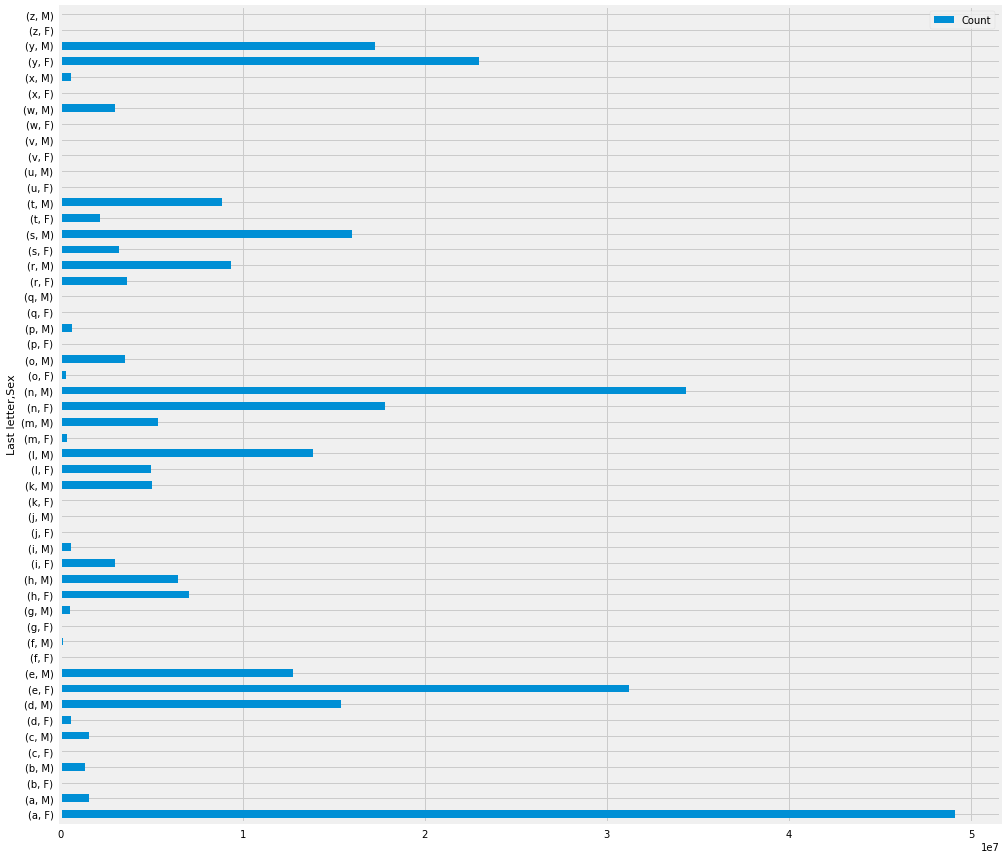

In [72]:
letter_counts.plot.barh(figsize=(15, 15))

In [73]:
last_letter_pivot = baby_names.pivot_table(
    index='Last letter',
    columns='Sex',
    values='Count',
    aggfunc=sum,
)

last_letter_pivot.head()

Sex,F,M
Last letter,,
a,49128453,1585024
b,9666,1369244
c,18211,1565621
d,564804,15423771
e,31212081,12778932


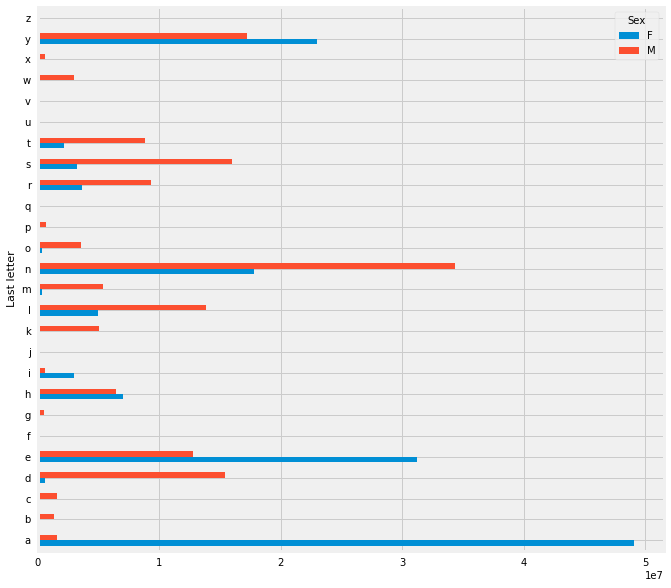

In [74]:
last_letter_pivot.plot.barh(figsize=(10, 10))

In [79]:
totals = last_letter_pivot['F'] + last_letter_pivot['M']

last_letter_props = pd.DataFrame({
    'F': last_letter_pivot['F'] / totals,
    'M': last_letter_pivot['M'] / totals,
}).sort_values('M')
last_letter_props.head()

,F,M
Last letter,,
a,0.968746,0.031254
i,0.830335,0.169665
e,0.709510,0.290490
z,0.645210,0.354790
y,0.571341,0.428659


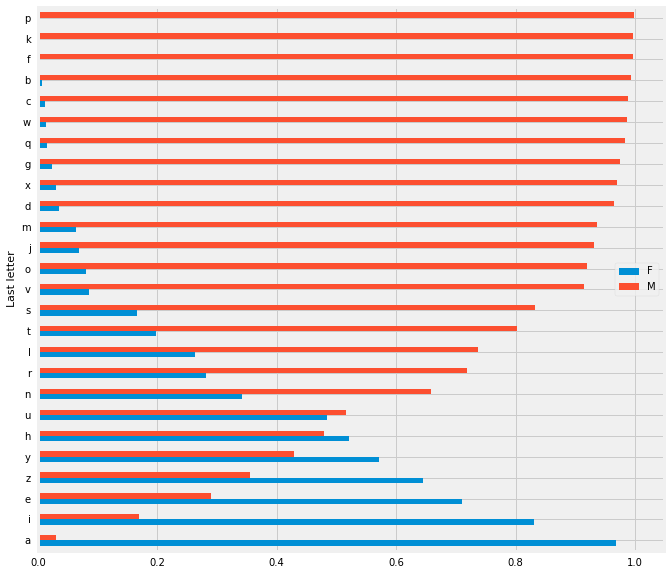

In [80]:
last_letter_props.plot.barh(figsize=(10, 10))

In [82]:
ca_and_ny = baby_names[
    (baby_names['Year'] == 2016)
    & (baby_names['State'].isin(['CA', 'NY']))
].reset_index(drop=True)
ca_and_ny.head()

,State,Sex,Year,Name,Count,Last letter
0,CA,F,2016,Mia,2785,a
1,CA,F,2016,Sophia,2747,a
2,CA,F,2016,Emma,2592,a
3,CA,F,2016,Olivia,2533,a
4,CA,F,2016,Isabella,2350,a


In [85]:
baby_names.query("Year==2016 and State in ['CA', 'NY']").reset_index(drop=True).head()


,State,Sex,Year,Name,Count,Last letter
0,CA,F,2016,Mia,2785,a
1,CA,F,2016,Sophia,2747,a
2,CA,F,2016,Emma,2592,a
3,CA,F,2016,Olivia,2533,a
4,CA,F,2016,Isabella,2350,a


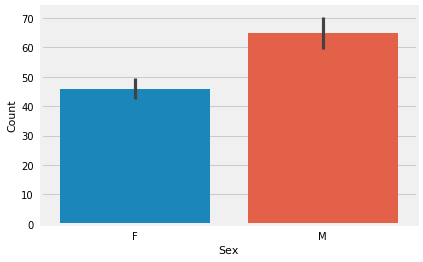

In [86]:
sns.barplot(x='Sex', y='Count', data=ca_and_ny)

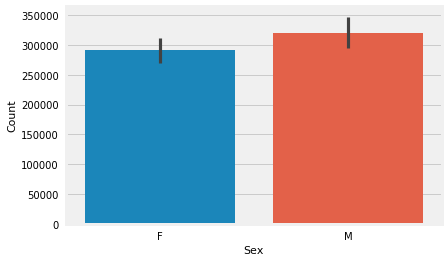

In [87]:
sns.barplot(x='Sex', y='Count', data=ca_and_ny, estimator=sum)

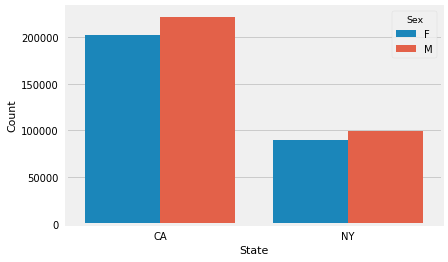

In [90]:
sns.barplot(x='State', y='Count', hue='Sex', data=ca_and_ny, ci=None, estimator=sum);


In [ ]:
ti